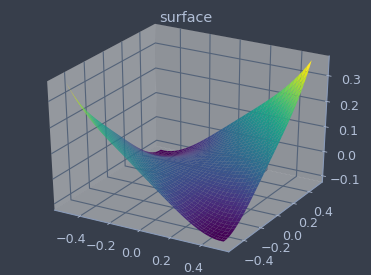

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x, y):
    return x**4 + y*np.sin(x) + y**4

x = np.linspace(-.5, .5, 40)
y = np.linspace(-.5, .5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [77]:
def f(x):
    return x[0]**4 + x[1]*np.sin(x[0]) + x[1]**4

def getGradient(x):
    return np.array([4*x[0]**3 + x[1]*np.cos(x[0]), 4*x[1]**3 + np.sin(x[0])])

def getHessian(x):
    h = np.zeros((2,2))
    h[0,0] = 12*x[0]**2 - x[1]*np.sin(x[0])
    h[1,1] = 12*x[1]**2
    h[0,1] = np.cos(x[0])
    h[1,0] = np.cos(x[0])
    return h

#from https://stackoverflow.com/questions/16266720/find-out-if-matrix-is-positive-definite-with-numpy
def isPositiveDefinite(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

def armijoSearch(x0, d, k):
    eta = 0.6
    gamma = 0.8
    t = 1

    while f(np.array(x0) + np.array(d)*t) > f(x0) + eta*t*np.dot(getGradient(x0).transpose(), d):
        k += 1
        t = gamma*t

    return t, k

def gradientMethod(x0):
    k = 0
    k_armijo = 0
    
    while getGradient(x0).any():
        d = -1*getGradient(x0)
        t, k_armijo = armijoSearch(x0, d, k_armijo)
        x0 = np.array(x0) + t*d
        k += 1
        
        if (getGradient(x0) == -1*d).all():
            print('delta == 0')
            break

        if np.linalg.norm(getGradient(x0)) <= 10**-15:
            print('gradient close to 0')
            break
        
    return np.array(x0), k, k_armijo

def newtonMethod(x0):
    k = 0
    k_armijo = 0
    
    while getGradient(x0).any():
        h = getHessian(x0)
        if not is_positive_definite(h):
            print('hessian not positive definite')
            break
            
        d = np.dot(-1*np.linalg.inv(h), getGradient(x0))
        t, k_armijo = armijoSearch(x0, d, k_armijo)
        x0 = np.array(x0) + d*t
        k += 1
        
        if np.linalg.norm(getGradient(x0)) <= 10**-15:
            print('gradient close to 0')
            break
    
    return np.array(x0), k, k_armijo

def quasiNewtonMethod(x0):
    k = 0
    k_armijo = 0
    
    x = x0
    while getGradient(x).any():
        if np.linalg.norm(getGradient(x)) <= 10**-15:
            print('gradient close to 0')
            break
                
        if k > 1000:
            print('too many iterations')
            break
        
        h = getHessian(x)
        gradient = getGradient(x)
        d = -1*np.dot(h, gradient)
        t, k_armijo = armijoSearch(x, d, k_armijo)
        x0 = np.array(x)
        x = np.array(x) + d*t
        
        p = x - x0
        q = getGradient(x) - getGradient(x0)

        # using BFGS
        param1 = q.T.dot(h).dot(q)/p.T.dot(q)
        param2 = p.dot(p.T)/p.T.dot(q)
        param3 = ( p.dot(q.T)*h + h.dot(q).dot(p.T) )/p.T.dot(q)
        h = h + ( 1 + param1 ) * param2 - param3
        
        k += 1
        
    return np.array(x0), k, k_armijo 

gradient close to 0
(array([9.11452639e-16, 7.38152388e-16]), 33, 169)


In [80]:
import random
import pandas as pd
from IPython.display import HTML

initial_values = [[random.uniform(-10.0, 10.0),random.uniform(-10.0, 10.0)] for i in range(5)]
methods = [gradient_method, newton_method, quasi_newton_method]
columns = ['X0','Iter.', 'Call. Armijo', 'Opt. Point','Opt. Value', 'Error']

for method in methods:
    df =  
    for x0 in initial_values:
        x, k, k_armijo = method(x0)
        r = f(x)
        
#     HTML(pd1.to_html())
        
        

[[0.7399431094388831, 9.911000518021392], [2.0311897354744968, -8.322495916615928], [0.7479694720150967, 4.956710355837277], [6.321813799110551, -2.1571759405175017], [-8.434516090908685, -2.112667407851216]]
